## Day 49- DIY Solution
**Q1. Problem Statement: Dimensionality Reduction** <br>
Write a Python program that reads the dairy_product.csv (provided on LMS) file into a
DataFrame, the following are the tasks that are to be taken into consideration while
reducing the dimensions of data.
1.	Load the mobile dairy_product.csv data into a DataFrame
2.	Find missing value and drop columns having more than 80% missing data
3.	Do label encoding for categorical features
4.	Extract independent variables (Xs) and dependent variables (Ys) into separate data objects and drop unwanted columns like “ID”
5.	Print low variance data
6.	Use random forest and print important features as per their value 
7.	Based on high correlation drop highly correlated columns much as you can 	find.


**Step 1:** Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 2:** Load given csv file into dataframe

In [45]:
df = pd.read_csv('dairy_product.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [46]:
df.shape

(8618, 45)

**Step 3:** Missing value analysis.

In [47]:
df.isna().sum()/len(df)*100 # drop missing value columns

ID                   0.000000
FoodGroup            0.000000
ShortDescrip         0.000000
Descrip              0.000000
CommonName          87.665352
MfgName             81.898352
ScientificName      91.506150
Energy_kcal          0.000000
Protein_g            0.000000
Fat_g                0.000000
Carb_g               0.000000
Sugar_g              0.000000
Fiber_g              0.000000
VitA_mcg             0.000000
VitB6_mg             0.000000
VitB12_mcg           0.000000
VitC_mg              0.000000
VitE_mg              0.000000
Folate_mcg           0.000000
Niacin_mg            0.000000
Riboflavin_mg        0.000000
Thiamin_mg           0.000000
Calcium_mg           0.000000
Copper_mcg           0.000000
Iron_mg              0.000000
Magnesium_mg         0.000000
Manganese_mg         0.000000
Phosphorus_mg        0.000000
Selenium_mcg         0.000000
Zinc_mg              0.000000
VitA_USRDA           0.000000
VitB6_USRDA          0.000000
VitB12_USRDA         0.000000
VitC_USRDA

**Step 4:** Drop unwanted columns.

In [48]:
df = df.drop(columns = ['CommonName', 'MfgName','ScientificName'],axis =1 )
# we are dropping these columns because it contain more than 85% missing data which is hard to fill missing gap.

In [49]:
df.describe(include= "object")

,FoodGroup,ShortDescrip,Descrip
count,8618,8618,8618
unique,25,8614,8618
top,Beef Products,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...","Butter, salted"
freq,946,2,1


**Step 5:** Do label encoding for catagorical features. 

In [50]:
#convert all catagorical data to numeric
catagorical = df.select_dtypes(include="object").columns
cat = ['FoodGroup', 'ShortDescrip', 'Descrip']
catagorical

Index(['FoodGroup', 'ShortDescrip', 'Descrip'], dtype='object')

In [51]:
cat

['FoodGroup', 'ShortDescrip', 'Descrip']

In [52]:
from sklearn import preprocessing
# we need to replce age bracate with labes
le = preprocessing.LabelEncoder()
df['FoodGroup'] = le.fit_transform(df['FoodGroup'].values)


In [53]:
df['ShortDescrip'] = le.fit_transform(df['ShortDescrip'].values)


In [54]:
df['Descrip'] = le.fit_transform(df['Descrip'].values)


In [55]:
df # all value are converted to numeric

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,7,1842,1816,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,7,1841,1817,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,7,1837,1812,876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,7,2701,2665,353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,7,2702,2666,371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,10,5194,3811,305.0,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,10,7155,5512,111.0,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,23,7825,7906,269.0,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,10,7362,5516,90.0,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**Step 6:** 4.	Extract independent variables (Xs) and dependent variables (Ys) into separate data objects and drop unwanted columns like “ID”

In [56]:
# ditribute x and y
x = df.drop(["ID","FoodGroup"],axis = 1)
y = df.FoodGroup

In [57]:
x.shape

(8618, 40)

In [58]:
#missing value
x.isnull().sum()*100/len(x) # no missing value found

ShortDescrip        0.0
Descrip             0.0
Energy_kcal         0.0
Protein_g           0.0
Fat_g               0.0
Carb_g              0.0
Sugar_g             0.0
Fiber_g             0.0
VitA_mcg            0.0
VitB6_mg            0.0
VitB12_mcg          0.0
VitC_mg             0.0
VitE_mg             0.0
Folate_mcg          0.0
Niacin_mg           0.0
Riboflavin_mg       0.0
Thiamin_mg          0.0
Calcium_mg          0.0
Copper_mcg          0.0
Iron_mg             0.0
Magnesium_mg        0.0
Manganese_mg        0.0
Phosphorus_mg       0.0
Selenium_mcg        0.0
Zinc_mg             0.0
VitA_USRDA          0.0
VitB6_USRDA         0.0
VitB12_USRDA        0.0
VitC_USRDA          0.0
VitE_USRDA          0.0
Folate_USRDA        0.0
Niacin_USRDA        0.0
Riboflavin_USRDA    0.0
Thiamin_USRDA       0.0
Calcium_USRDA       0.0
Copper_USRDA        0.0
Magnesium_USRDA     0.0
Phosphorus_USRDA    0.0
Selenium_USRDA      0.0
Zinc_USRDA          0.0
dtype: float64

In [59]:
x.shape

(8618, 40)

In [60]:
x_orig = x.copy()

**Step 7:** Low Variance Filter

In [61]:
x.var()

ShortDescrip        6.185080e+06
Descrip             6.189878e+06
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USR

In [62]:
x_v = x/x.mean()
x_v.var()

ShortDescrip          0.333575
Descrip               0.333449
Energy_kcal           0.559589
Protein_g             0.838212
Fat_g                 2.220740
Carb_g                1.558512
Sugar_g               4.299032
Fiber_g               4.545673
VitA_mcg             68.787804
VitB6_mg              3.277549
VitB12_mcg           12.426439
VitC_mg              52.789196
VitE_mg              19.468913
Folate_mcg           13.753041
Niacin_mg             2.008214
Riboflavin_mg         3.595733
Thiamin_mg            6.101428
Calcium_mg            7.523775
Copper_mcg           10.317163
Iron_mg               4.509842
Magnesium_mg          2.931833
Manganese_mg        160.136991
Phosphorus_mg         1.695188
Selenium_mcg          5.029991
Zinc_mg               2.905286
VitA_USRDA           68.787804
VitB6_USRDA           3.277549
VitB12_USRDA         12.426439
VitC_USRDA           52.789196
VitE_USRDA           19.468913
Folate_USRDA         13.753041
Niacin_USRDA          2.008214
Riboflav

In [63]:
x_v.var()>0.03

ShortDescrip        True
Descrip             True
Energy_kcal         True
Protein_g           True
Fat_g               True
Carb_g              True
Sugar_g             True
Fiber_g             True
VitA_mcg            True
VitB6_mg            True
VitB12_mcg          True
VitC_mg             True
VitE_mg             True
Folate_mcg          True
Niacin_mg           True
Riboflavin_mg       True
Thiamin_mg          True
Calcium_mg          True
Copper_mcg          True
Iron_mg             True
Magnesium_mg        True
Manganese_mg        True
Phosphorus_mg       True
Selenium_mcg        True
Zinc_mg             True
VitA_USRDA          True
VitB6_USRDA         True
VitB12_USRDA        True
VitC_USRDA          True
VitE_USRDA          True
Folate_USRDA        True
Niacin_USRDA        True
Riboflavin_USRDA    True
Thiamin_USRDA       True
Calcium_USRDA       True
Copper_USRDA        True
Magnesium_USRDA     True
Phosphorus_USRDA    True
Selenium_USRDA      True
Zinc_USRDA          True


In [64]:
x = x.loc[:,x_v.var()>0.03] # columns having morehan 0.03 variance will be printed only
x.shape

(8618, 40)

**Step 8:** Build random forest model and extract important fetures

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 29)
# we are using random forest to find out most importtrant features.
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.feature_importances_ 

array([0.06687157, 0.08266976, 0.04115676, 0.04546859, 0.03538563,
       0.06634096, 0.02383498, 0.02774831, 0.0103028 , 0.01841482,
       0.02271065, 0.01998028, 0.01186846, 0.01751411, 0.02174661,
       0.01398876, 0.0271376 , 0.01829702, 0.01534747, 0.02427784,
       0.01727623, 0.02341767, 0.01505137, 0.02022842, 0.02831571,
       0.01248908, 0.01792826, 0.02575406, 0.0202071 , 0.01005343,
       0.01807784, 0.02215163, 0.01366625, 0.02357148, 0.01800239,
       0.01623779, 0.01901314, 0.017169  , 0.02110469, 0.0292215 ])

In [66]:
rf_feat = pd.Series(rf.feature_importances_, index= x_train.columns)
rf_feat # feature importance based on their score 

ShortDescrip        0.066872
Descrip             0.082670
Energy_kcal         0.041157
Protein_g           0.045469
Fat_g               0.035386
Carb_g              0.066341
Sugar_g             0.023835
Fiber_g             0.027748
VitA_mcg            0.010303
VitB6_mg            0.018415
VitB12_mcg          0.022711
VitC_mg             0.019980
VitE_mg             0.011868
Folate_mcg          0.017514
Niacin_mg           0.021747
Riboflavin_mg       0.013989
Thiamin_mg          0.027138
Calcium_mg          0.018297
Copper_mcg          0.015347
Iron_mg             0.024278
Magnesium_mg        0.017276
Manganese_mg        0.023418
Phosphorus_mg       0.015051
Selenium_mcg        0.020228
Zinc_mg             0.028316
VitA_USRDA          0.012489
VitB6_USRDA         0.017928
VitB12_USRDA        0.025754
VitC_USRDA          0.020207
VitE_USRDA          0.010053
Folate_USRDA        0.018078
Niacin_USRDA        0.022152
Riboflavin_USRDA    0.013666
Thiamin_USRDA       0.023571
Calcium_USRDA 

In [67]:
x = x.loc[:, rf_feat>0.01]
x.shape

(8618, 40)

**Step 9:** Correlation Filter

In [68]:
x_cor = x.corr()>0.8

In [69]:
x_cor

,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ShortDescrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Descrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Energy_kcal,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protein_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fat_g,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carb_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sugar_g,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fiber_g,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
VitA_mcg,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
VitB6_mg,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [70]:
x_cor_cols = ['ShortDescrip', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg',
       'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg',
       'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA']

In [71]:
x_cor['ShortDescrip']

ShortDescrip         True
Descrip              True
Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USR

**Step 10:** Drop corelated columns 

In [72]:
# drop who ever is true for ShortDescrip
# If we want to reduce 
x = x.drop(['Descrip'], axis=1)
print("final shape of dataFrame is",x.shape)

final shape of dataFrame is (8618, 39)


**Conclusion**: In the start  we had 45 features out of that we reduced to 39.

**Q2. Problem Statement: Linear Discriminant Analysis**<br>
1.	Use the above-separated data of X and Y 
2.	Standardizes the data 
3.	Perform LDA 
4.	Plot the graph of LDA for Test data 
5.	Build a Random forest model and evaluate your data


**Step 1:** Split data into train and test 

In [73]:
#Training & testing data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

**Step 2:** Perform feature scaling 

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

**Step 3:** Perfom LDA

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

LinearDiscriminantAnalysis class is imported as LDA. Like PCA, we have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.

Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

**Step 4:** Plot the graph

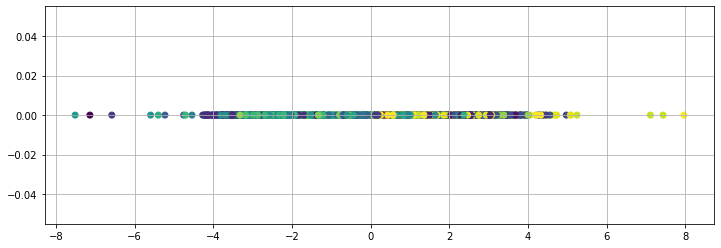

In [76]:
plt.figure(figsize=(12,4))
plt.scatter(X_test, np.zeros(len(X_test)), c=y_test)
plt.grid()
plt.show()

**Step 5:** Training & Testing the data

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

**Step 6:** Evaluate the model

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))  

Accuracy: 0.22621809744779584
